# VO9 Monte Carlo Integration

https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration

In [1]:
import numpy as np
import random
import math

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

## Calculate PI

In [2]:
length = 1000000
x, y = np.random.rand(length), np.random.rand(length)

accept = 0
for i in range(length):
    if(x[i]**2 + y[i]**2 <= 1):
        accept += 1

print(4*accept/length)

3.141924


In [3]:
length = 10000000
exact_solution = np.pi

print_list = [10**item for item in np.arange(9)]

accept = 0
for i in tqdm(range(length+1)):
    if(random.random()**2 + random.random()**2 <= 1):
        accept += 1
    if(i in print_list):
        print("curr result: %.4f, error: %.4e at iteration: %i" % (
            4*accept/i, abs(exact_solution-4*accept/i), i))

curr result: 8.0000, error: 4.8584e+00 at iteration: 1
curr result: 4.0000, error: 8.5841e-01 at iteration: 10
curr result: 3.1200, error: 2.1593e-02 at iteration: 100
curr result: 3.0440, error: 9.7593e-02 at iteration: 1000
curr result: 3.1316, error: 9.9927e-03 at iteration: 10000
curr result: 3.1401, error: 1.4727e-03 at iteration: 100000
curr result: 3.1413, error: 3.1665e-04 at iteration: 1000000
curr result: 3.1418, error: 1.9295e-04 at iteration: 10000000



## Integrate e^-2x from 0 to inf

In [4]:
length = 10000000
max_x = 10
exact_solution = 0.5

print_list = [10**item for item in np.arange(9)]

accept = 0
for i in tqdm(range(length+1)):
    if(math.exp(-2*random.random()*max_x) >= random.random()):
        accept += 1
    if(i in print_list):
        print("curr result: %.4f, error: %.4e at iteration: %i" % (
            max_x*accept/i, abs(exact_solution-max_x*accept/i), i))

curr result: 0.0000, error: 5.0000e-01 at iteration: 1
curr result: 0.0000, error: 5.0000e-01 at iteration: 10
curr result: 0.9000, error: 4.0000e-01 at iteration: 100
curr result: 0.5500, error: 5.0000e-02 at iteration: 1000
curr result: 0.5060, error: 6.0000e-03 at iteration: 10000
curr result: 0.5107, error: 1.0700e-02 at iteration: 100000
curr result: 0.5010, error: 9.7000e-04 at iteration: 1000000
curr result: 0.5000, error: 4.9000e-05 at iteration: 10000000



## Recap Non Uniform Random Distributions

In [51]:
def show_dist(length, inverse_probability_function, first_derivative_prob_function):
    x = np.random.rand(length)
    plt.title("Unformly distributed random numbers", fontsize=12)
    plt.hist(x, bins=100)
    plt.show()
    plt.close()

    x_non_uniform = inverse_probability_function(x)
    plt.title("Non-uniformly, e^-x distributed random numbers", fontsize=12)
    plt.hist(x_non_uniform, bins=100)
    plt.show()
    plt.close()

    # the PDF - probability density function is the derivative of the probability function
    # http://mathworld.wolfram.com/DistributionFunction.html
    x_axis = np.arange(int(max(x_non_uniform)*100))/100
    pdf = abs(first_derivative_prob_function(x_axis))
    plt.title("PDF of e^-x distributed random numbers", fontsize=12)
    plt.plot(x_axis, pdf)
    plt.show()
    plt.close()
    
    return None

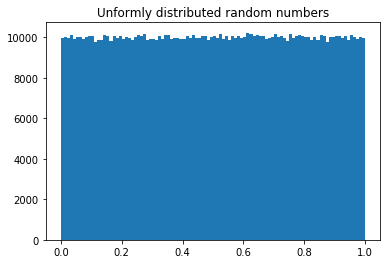

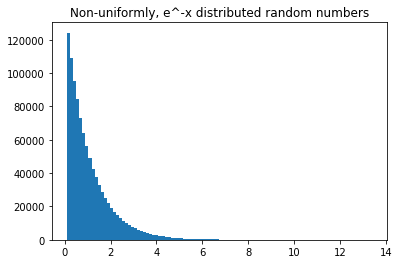

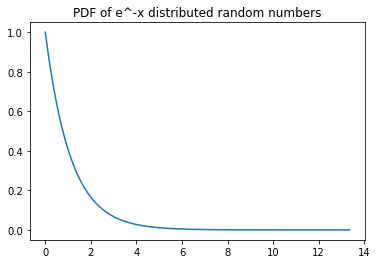

In [85]:
# the probability function is e^-x

length = 1000000

# the inverse of the probability function is -ln(x)
def inverse_probability_function(x):
    return -np.log(x)

# the derivative of e^-x is -e^-x, the pdf can only have positive values, so abs(-e^-x)
def first_derivative_prob_function(x): # PDF
    return -np.exp(-x)
    
show_dist(length, inverse_probability_function, first_derivative_prob_function)

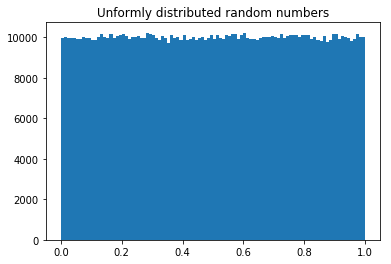

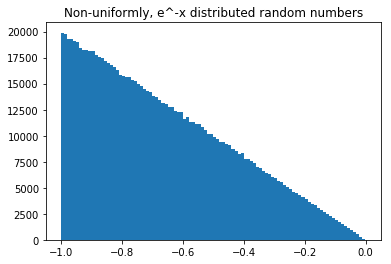

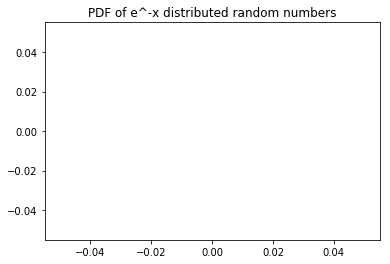

In [74]:
# the probability function is x^-2

length = 1000000

# the inverse of the probability function is -ln(x)
def inverse_probability_function(x):
    return -np.sqrt(x)

# the derivative of x^-2 is -2x
def first_derivative_prob_function(x): # PDF
    return -2*x
    
show_dist(length, inverse_probability_function, first_derivative_prob_function)

## Importance Sampling

In [90]:
def inverse_probability_function(x):
    return -np.log(x)

def pdf(x): # PDF
    return abs(-np.exp(-x))

x = np.random.rand(length)
x_non_uniform = inverse_probability_function(x)
# pdf(x_non_uniform)

In [91]:
length = 10000000
exact_solution = 0.5

print_list = [10**item for item in np.arange(9)]

accept = 0
for i in tqdm(range(length+1)):
    curr_x = inverse_probability_function(random.random())
    if(math.exp(-2*curr_x) >= random.random()):
        accept += 1/pdf(curr_x)

    if(i in print_list):
        print("curr result: %.4f, error: %.4e at iteration: %i" % (
            accept/i, abs(exact_solution-accept/i), i))

curr result: 0.0000, error: 5.0000e-01 at iteration: 1
curr result: 0.6006, error: 1.0061e-01 at iteration: 10
curr result: 0.5727, error: 7.2719e-02 at iteration: 100
curr result: 0.4781, error: 2.1873e-02 at iteration: 1000
curr result: 0.4922, error: 7.7812e-03 at iteration: 10000
curr result: 0.4955, error: 4.4665e-03 at iteration: 100000
curr result: 0.5015, error: 1.5160e-03 at iteration: 1000000
curr result: 0.5001, error: 5.7015e-05 at iteration: 10000000


In [81]:
length = 10000000
max_x = 10
exact_solution = 0.5

print_list = [10**item for item in np.arange(9)]

accept = 0
for i in tqdm(range(length+1)):
    if(math.exp(-2*random.random()*max_x) >= random.random()):
        accept += 1
    if(i in print_list):
        print("curr result: %.4f, error: %.4e at iteration: %i" % (
            max_x*accept/i, abs(exact_solution-max_x*accept/i), i))

curr result: 0.0000, error: 5.0000e-01 at iteration: 1
curr result: 0.0000, error: 5.0000e-01 at iteration: 10
curr result: 0.6000, error: 1.0000e-01 at iteration: 100
curr result: 0.4900, error: 1.0000e-02 at iteration: 1000
curr result: 0.4960, error: 4.0000e-03 at iteration: 10000
curr result: 0.4970, error: 3.0000e-03 at iteration: 100000
curr result: 0.4976, error: 2.4100e-03 at iteration: 1000000
curr result: 0.4998, error: 2.0300e-04 at iteration: 10000000
